In [8]:
import math

# Given values
number_of_wheels = 2
wheel_diameter = 2.3  # inches
wheel_diameter_meters = wheel_diameter * 0.0254  # converting to meters
target_speed_mps = 1  # speed in meters per second
coefficient_of_friction = 0.4  # for marble
gravity = 9.81  # m/s^2

#https://wiki.dfrobot.com/How_to_Calculate_the_Motor_Torque_for_a_Mobile_Robot

In [9]:
# Weights of individual components in grams
weight_raspberry_pi = 45  # Raspberry Pi Zero W
weight_motor_driver = 30  # Motor driver
weight_wheels = 20  # Two wheels
weight_chassis = 50  # Chassis
weight_battery = 100  # Battery pack
weight_motors = 100
weight_misc = 100  # Miscellaneous components (wires, screws, etc.)

# Total weight
mass_robot = weight_raspberry_pi + weight_motor_driver + weight_wheels +weight_motors+weight_chassis + weight_battery + weight_misc
mass_robot = mass_robot / 1000
print(f'Total estimated weight of the robot: {mass_robot*1000} grams')

# Calculate the circumference of the wheel
circumference = math.pi * wheel_diameter_meters

# Calculate RPM needed to achieve the desired speed
rpm_needed = (target_speed_mps * 60) / circumference
print(f'RPM needed to hit 1m/s: {rpm_needed:.0f} RPM')


# Calculate the force due to friction
force_friction = coefficient_of_friction * mass_robot * gravity
print(f'Force_friction: {force_friction:.2f} N')

# Calculate the acceleration needed to reach 1 m/s in 0.5 meters
distance = 0.5  # meters
final_velocity = 1  # m/s
initial_velocity = 0  # m/s

# Using the kinematic equation: v^2 = u^2 + 2*a*s
acceleration = (final_velocity**2 - initial_velocity**2) / (2 * distance)

# Calculate the force required using F = m * a
force_required = mass_robot * acceleration
print(f'Force required to accelerate to 1m/s in 0.5m: {force_required:.2f} N')

# Sum for total force in N
total_force = force_friction + force_required
print(f'Total force: {total_force:.2f} N')

# Calculate the torque required
torque_required = (total_force / number_of_wheels) * (wheel_diameter_meters / 2)
print(f'Torque required per motor: {torque_required:.2f} Nm')

# Conversion factor from Nm to kgcm
conversion_factor_nm_to_kgcm = 10.197162129779

# Convert torque required to kgcm
torque_required_kgcm = torque_required * conversion_factor_nm_to_kgcm
print(f'Torque required per motor: {torque_required_kgcm:.2f} kgcm')


Total estimated weight of the robot: 445.0 grams
RPM needed to hit 1m/s: 327 RPM
Force_friction: 1.75 N
Force required to accelerate to 1m/s in 0.5m: 0.45 N
Total force: 2.19 N
Torque required per motor: 0.03 Nm
Torque required per motor: 0.33 kgcm


##### Motor options
* https://www.dfrobot.com/product-1619.html
    * Slightly slow but wayyy overkill on torque
* https://www.dfrobot.com/product-1749.html
    * Undersized
* https://www.dfrobot.com/product-1750.html
    * Reasonable <-- no encoder which sucks but otherwise ideal
* https://www.dfrobot.com/product-1431.html
    * Good option if we want to go half the speed -- comes with encoder. Would use dfrobot wheels 1.63"
* https://www.pololu.com/product/3712/specs
    * Need to get separate encoder
    * Encoders here https://www.pololu.com/product/3499
    * Wheel adapters https://www.pololu.com/product/1997
    * Wheels https://www.pololu.com/product/1420
    * Mounting Brackets https://www.pololu.com/product/1138
* https://www.pololu.com/product/4802/specs
    * super fast but large

In [6]:
#https://www.pololu.com/product/3712/specs

motor_load_speed = 440 #rpm
motor_load_torque = 0.33 #kgcm
motor_stall_torque = 1.6 #kgcm

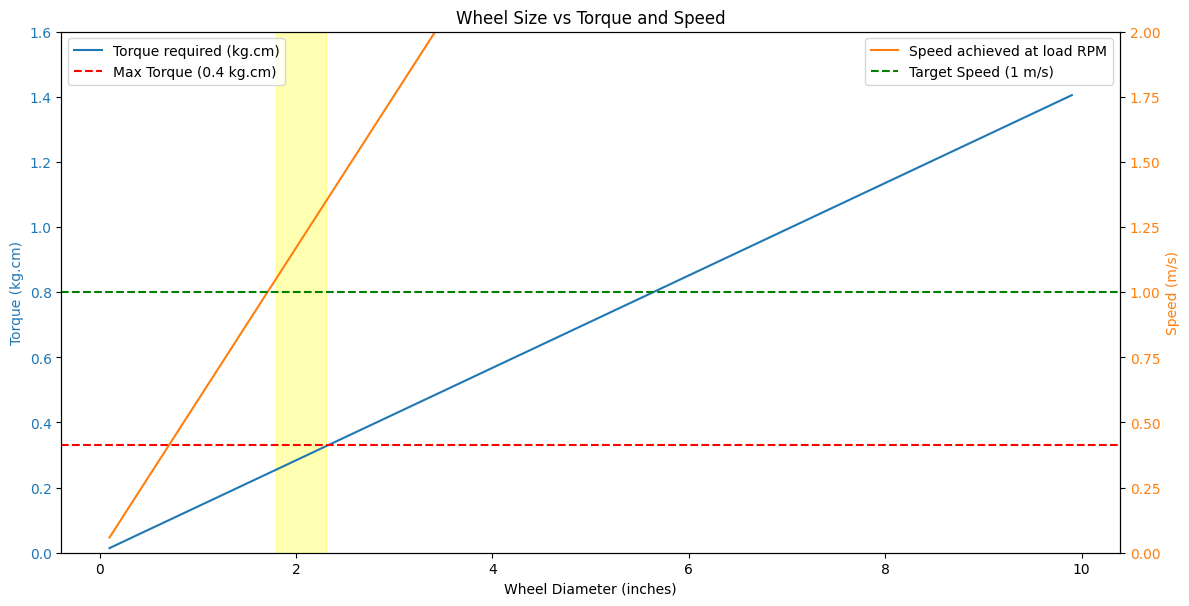

Optimal wheel diameter range: 1.80 inches (45.72 mm) to 2.30 inches (58.42 mm)


In [7]:
# Function to calculate torque for a given wheel diameter
def calculate_torque(wheel_diameter_meters):
    circumference = math.pi * wheel_diameter_meters
    rpm_needed = (target_speed_mps * 60) / circumference
    force_friction = coefficient_of_friction * mass_robot * gravity
    acceleration = (final_velocity**2 - initial_velocity**2) / (2 * distance)
    force_required = mass_robot * acceleration
    total_force = force_friction + force_required
    torque_required = (total_force / number_of_wheels) * (wheel_diameter_meters / 2)
    torque_required_kgcm = torque_required * conversion_factor_nm_to_kgcm
    return torque_required_kgcm

import matplotlib.pyplot as plt
# Lists to store wheel diameters, torques, and speeds
wheel_diameters_inches = [i * 0.1 for i in range(1, 100)]
wheel_diameters = [d * 0.0254 for d in wheel_diameters_inches]
torques = []
speeds = []

# Calculate torque and speed for each wheel diameter
for diameter in wheel_diameters:
    torque = calculate_torque(diameter)
    torques.append(torque)
    speed = (motor_load_speed * diameter * math.pi) / 60
    speeds.append(speed)

# Determine the range of wheel diameters where the torque required is < motor_load_torque and the speed achieved at load > target_speed_mps
optimal_wheel_diameters = []
optimal_wheel_diameters_inches = []

for i, torque in enumerate(torques):
    if torque < motor_load_torque and speeds[i] > target_speed_mps:
        optimal_wheel_diameters.append(wheel_diameters[i])
        optimal_wheel_diameters_inches.append(wheel_diameters_inches[i])

# Plot wheel size vs torque and speed with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Wheel Diameter (inches)')
ax1.set_ylabel('Torque (kg.cm)', color=color)
ax1.plot(wheel_diameters_inches, torques, label='Torque required (kg.cm)', color=color)
ax1.axhline(y=motor_load_torque, color='red', linestyle='--', label='Max Torque (0.4 kg.cm)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, motor_stall_torque)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Speed (m/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(wheel_diameters_inches, speeds, label='Speed achieved at load RPM', color=color)
ax2.axhline(y=target_speed_mps, color='green', linestyle='--', label='Target Speed (1 m/s)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, target_speed_mps * 2)
ax2.legend(loc='upper right')

# Shade the optimal range
if optimal_wheel_diameters:
    ax1.axvspan(optimal_wheel_diameters_inches[0], optimal_wheel_diameters_inches[-1], color='yellow', alpha=0.3, label='Optimal Range')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Wheel Size vs Torque and Speed')
plt.show()
if optimal_wheel_diameters:
    print(f'Optimal wheel diameter range: {optimal_wheel_diameters_inches[0]:.2f} inches ({optimal_wheel_diameters[0]*1000:.2f} mm) to {optimal_wheel_diameters_inches[-1]:.2f} inches ({optimal_wheel_diameters[-1]*1000:.2f} mm)')
else:
    print('No optimal wheel diameter range found that meets the criteria.')


##### Wheel Chosen
* https://www.pololu.com/product/1420 <- 60mm wheel. 
* https://www.pololu.com/product/1997 <-- Wheel adapters
* https://www.pololu.com/product/1076 <-- Screws

